<a href="https://colab.research.google.com/github/NeoLin1103/Machine-learning-algorithms/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

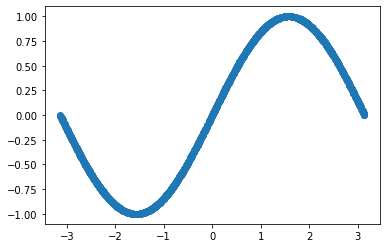

In [2]:
# X = np.random.rand(100) * 2 * np.pi
# 一開始X的範圍設在0到2*pi的時候，多項式迴歸學不起來sin函數，
# 後來參考別人寫好的code，把X的範圍改成-pi到pi就學得起來了，
# 只是不曉得為什麼會這樣
X = (np.random.rand(2000) * 2 * np.pi) - np.pi
Y = np.sin(X)
plt.scatter(X,Y)
plt.show()

In [16]:
# 使用三次方程式估計 f(x)
a = torch.rand((),requires_grad=True, dtype=torch.float)
b = torch.rand((),requires_grad=True, dtype=torch.float)
c = torch.rand((),requires_grad=True, dtype=torch.float)
d = torch.rand((),requires_grad=True, dtype=torch.float)
def func(x):
  return a*(x**3) + b*(x**2) + c*x + d

In [4]:
X_t = torch.FloatTensor(X)
Y_t = torch.FloatTensor(Y)

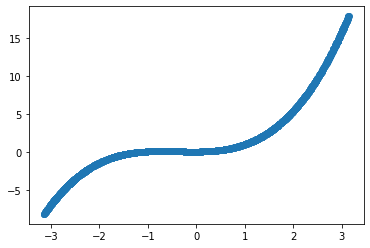

In [9]:
plt.scatter(X_t.detach().numpy(),func(X_t).detach().numpy())

In [17]:
lr = 1e-6
Epochs = 2000
for e in range(Epochs):
  y_hat = func(X_t) # 使用三次方程式估計 f(x)
  loss = (Y_t - y_hat)**2 # 損失函數: MSE
  loss.sum().backward() # 計算Gradiet
  with torch.no_grad():
    # Gradiet descent
    a -= lr * a.grad
    b -= lr * b.grad
    c -= lr * c.grad
    d -= lr * d.grad
  a.grad = None
  b.grad = None
  c.grad = None
  d.grad = None

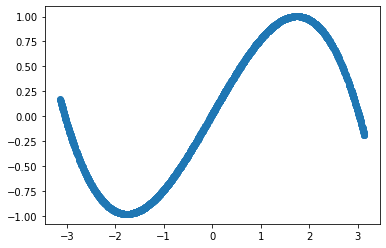

In [18]:
plt.scatter(X_t.detach().numpy(),func(X_t).detach().numpy())
plt.show()